#                               TASK 1
##      The Spark Fondation
## Data Science and Business Anaytics  Task-1

## Task by Aleena Sunny
## Prediction using Supervised ML
### Predict the percentage of an student based on the no. of study hours


### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Explore the data

 To read the required csv file

In [2]:
study_hours=pd.read_csv(r'C:\Users\Aloshious\Documents\mark vs hours.csv')

In [3]:
study_hours.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
study_hours.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
study_hours.shape

(25, 2)

There are 25 rows in the dataset

In [6]:
study_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
study_hours.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
study_hours.isna().sum()

Hours     0
Scores    0
dtype: int64

There are no null values

### Visualise the data

Text(0.5, 1.0, 'Scores of a student based on the no. of hours')

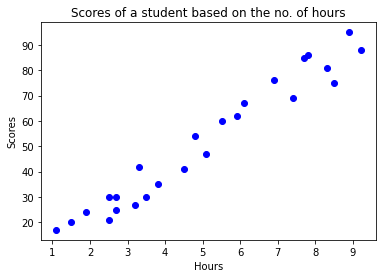

In [9]:
plt.scatter(study_hours.Hours,study_hours.Scores,c='b') # To find the relation between the two variables
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores of a student based on the no. of hours')

 It shows a positive linear relationship between no. of hours and scores obtained

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

#### To find the correlation

In [11]:
correlation=study_hours.corr() 

<AxesSubplot:>

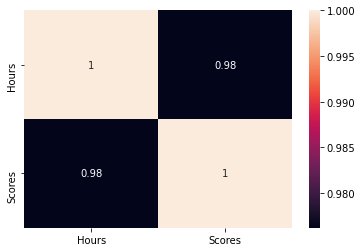

In [12]:
sns.heatmap(correlation,cbar=True,annot=True)

In [13]:
x=study_hours.iloc[:,:-1].values # Taking the input column in x
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y=study_hours.iloc[:,-1].values # Taking the output column in y
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### Spliting the data into training and testing

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [16]:
linear_reg=LinearRegression()

In [17]:
linear_reg.fit(x_train,y_train)
print('completed')

completed


In [18]:
line=linear_reg.coef_*x+linear_reg.intercept_

#### Implementing the line function

Text(0, 0.5, 'Scores obtained')

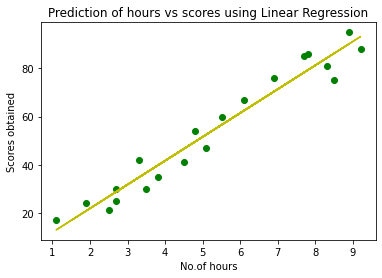

In [19]:
plt.scatter(x_train,y_train,c='g')
plt.plot(x,line,c='y')
plt.title('Prediction of hours vs scores using Linear Regression')
plt.xlabel('No.of hours')
plt.ylabel('Scores obtained')

### Model Testing

In [20]:
y_predict=linear_reg.predict(x_test)

In [21]:
df=pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
df # predicting the scores

,Predicted,Actual
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


### Model Evaluation

In [22]:
MAE=metrics.mean_absolute_error(y_predict,y_test)
print('The Mean Absolute Error is %f'%(MAE))

The Mean Absolute Error is 4.183860


In [23]:
MSE=metrics.mean_squared_error(y_predict,y_test)
print('The Mean Squared Error is %f'%(MSE))

The Mean Squared Error is 21.598769


In [24]:
ME=metrics.max_error(y_predict,y_test)
print('The Maximum Error is %f'%(ME))

The Maximum Error is 6.732261


#### What  will be the predicted score if a student studies for 9.25 hrs\ day?


In [25]:
Hour=9.25
predict=linear_reg.predict([[Hour]])
print('predicted score is %.3f if a student studies for %.2f hrs/ day.'%(predict,Hour))

predicted score is 93.692 if a student studies for 9.25 hrs/ day.
